<a href="https://colab.research.google.com/github/Shanukusai/data_analysis_algorithms/blob/main/DDA_lesson02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

__1.__ Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [16]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 3)

In [17]:
scaler = StandardScaler()

In [18]:
data = scaler.fit_transform(data)

In [19]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [20]:
def learning_schedule(t, t_start = 1.):
    return t_start / (t + t_start)

### Стохастический градиентный спуск.

In [30]:
w = np.zeros(2)
w_list = [w.copy()]
errors = []
max_iter = 1e5
#tol= 1e-6
eta = 0.04
weight_dist = np.inf
iter_num = 0
np.random.seed(1234)
min_weight_dist = 1e-8

#while iter_num < max_iter:
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    #eta = learning_schedule(iter_num+1)
    train_ind = np.random.randint(data.shape[0])
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))   
    iter_num += 1
    w = new_w
    #if iter_num > 2 and np.abs(errors[-1] - errors[-2]) < tol:
        #break
w_list = np.array(w_list)

print(f'w = {w_list[-1]}, MSE = {round(errors[-1], 6)}')

w = [54.46193367 94.33160452], MSE = 29.809649


### Градиентный спуск

In [22]:
w = np.zeros(2)
w_list1 = [w.copy()]
errors1 = []
max_iter = 1e4
#tol= 1e-6
weight_dist = np.inf
iter_num = 0
np.random.seed(1234)
min_weight_dist = 1e-8
eta = 0.1
#while iter_num < max_iter:
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    w_list1.append(new_w.copy())
    errors1.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    #if iter_num > 2 and np.abs(errors[-1] - errors[-2]) < tol:
        #break
w_list1 = np.array(w_list1)

print(f'w = {w_list1[-1]}, MSE = {round(errors1[-1], 4)}')

w = [54.93485657 95.12420775], MSE = 28.9597


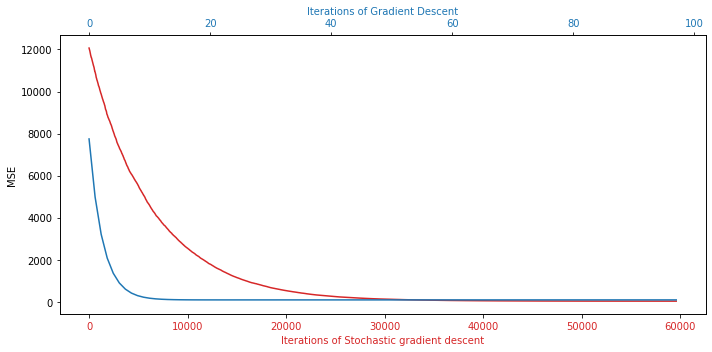

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Iterations of Stochastic gradient descent', color=color)
ax1.set_ylabel('MSE')
ax1.plot(errors, color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()

color = 'tab:blue'
ax2.set_xlabel('Iterations of Gradient Descent', color=color)
ax2.plot(errors1, color=color)
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.show()


Из графика видно, что сходимость Градиентного спуска наступает на ~100 операции, а Стохастического градиентного спуска ~60000. Однако при значительном увеличении количества наблюдаемых данных время выполнения Стохастического градиентного спуска окажется быстрее.

__2.__ Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

### Стохастический градиентный спуск.

In [24]:
w = np.zeros(2)
w_list = [w.copy()]
errors = []
max_iter = 1e5
#tol= 1e-6
eta = 0.04
weight_dist = np.inf
iter_num = 0
np.random.seed(1234)
min_weight_dist = 1e-8
lambda_ = 0.005

#while iter_num < max_iter:
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    #eta = learning_schedule(iter_num+1)
    train_ind = np.random.randint(data.shape[0])
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target) + lambda_ * np.sum(np.square(new_w)))
    
    iter_num += 1
    w = new_w
    #if iter_num > 2 and np.abs(errors[-1] - errors[-2]) < tol:
        #break
w_list = np.array(w_list)

print(f'w = {w_list[-1]}, MSE + L2-regularization= {round(errors[-1], 4)}')

w = [54.46193367 94.33160452], MSE + L2-regularization= 89.1324


### Градиентный спуск

In [25]:
w = np.zeros(2)
w_list1 = [w.copy()]
errors1 = []
max_iter = 1e4
#tol= 1e-6
weight_dist = np.inf
iter_num = 0
np.random.seed(1234)
min_weight_dist = 1e-8
eta = 0.1
lambda_ = 0.005

#while iter_num < max_iter:
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    w_list1.append(new_w.copy())
    errors1.append(mserror(data, new_w, target) + lambda_ * np.sum(np.square(new_w)))
    
    iter_num += 1
    w = new_w
    #if iter_num > 2 and np.abs(errors[-1] - errors[-2]) < tol:
        #break
w_list1 = np.array(w_list1)

print(f'w = {w_list1[-1]}, MSE = {round(errors1[-1], 4)}')

w = [54.93485657 95.12420775], MSE = 89.2919


При увеличении значения lambda - увеличивается разброс метрики ошибки. Также введение L2 регуляризации замеляет сходимость Стохастического градиентного спуска.